# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

3. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import make_regression

In [2]:
%config InlineBackend.figure_format = 'png'

In [3]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

## Creating Data

In [4]:
# making data
X_y = make_regression(n_samples=100, n_features=3, n_informative=3, n_targets=1, \
                      bias=100, noise=20, shuffle=True, random_state=42)
X = X_y[0].T
y = X_y[1]

# adding column of ones
X = np.vstack([np.ones(100), X])

<function matplotlib.pyplot.show(close=None, block=None)>

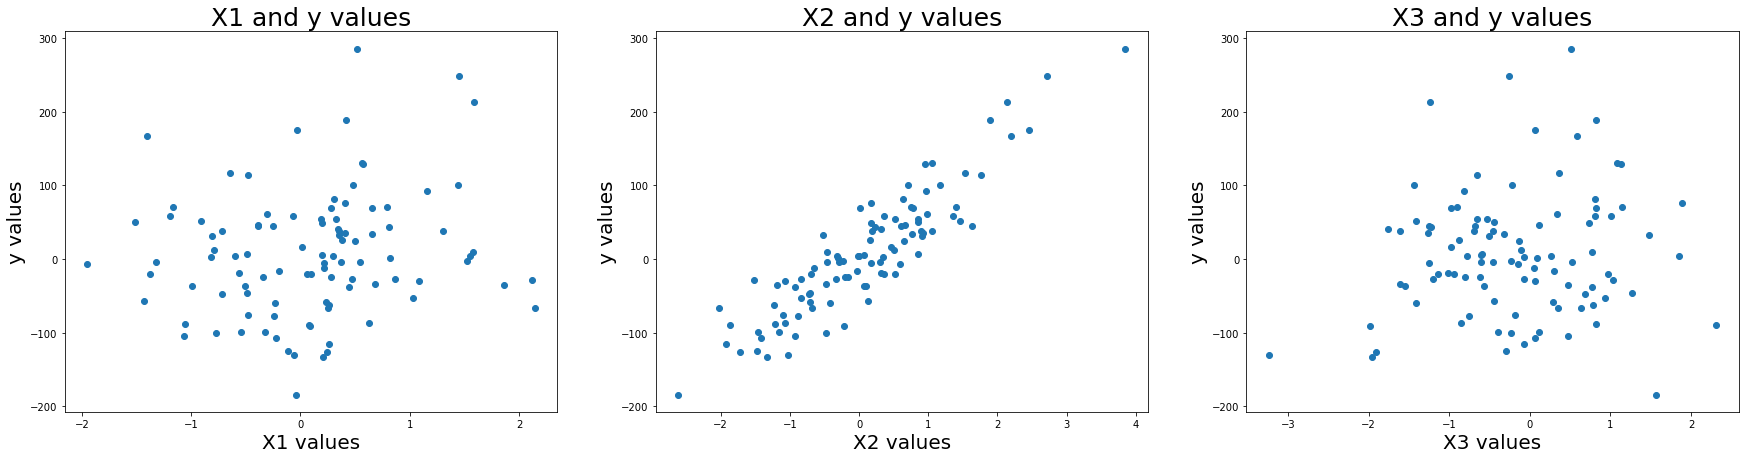

In [5]:
fig = plt.figure(figsize=(30, 7))

plt.subplot(131)
plt.scatter(X[1], y)
plt.xlabel('X1 values', {'fontsize': 20})
plt.ylabel('y values', {'fontsize': 20})
plt.title('X1 and y values', {'fontsize': 25})

plt.subplot(132)
plt.scatter(X[2], y)
plt.xlabel('X2 values', {'fontsize': 20})
plt.ylabel('y values', {'fontsize': 20})
plt.title('X2 and y values', {'fontsize': 25})

plt.subplot(133)
plt.scatter(X[3], y)
plt.xlabel('X3 values', {'fontsize': 20})
plt.ylabel('y values', {'fontsize': 20})
plt.title('X3 and y values', {'fontsize': 25})

plt.show

## Normalizing Data

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[3] = (X[3] - X[3].min()) / (X[3].max() - X[3].min())

In [7]:
# for easier coding in advance
X = X_norm.copy()

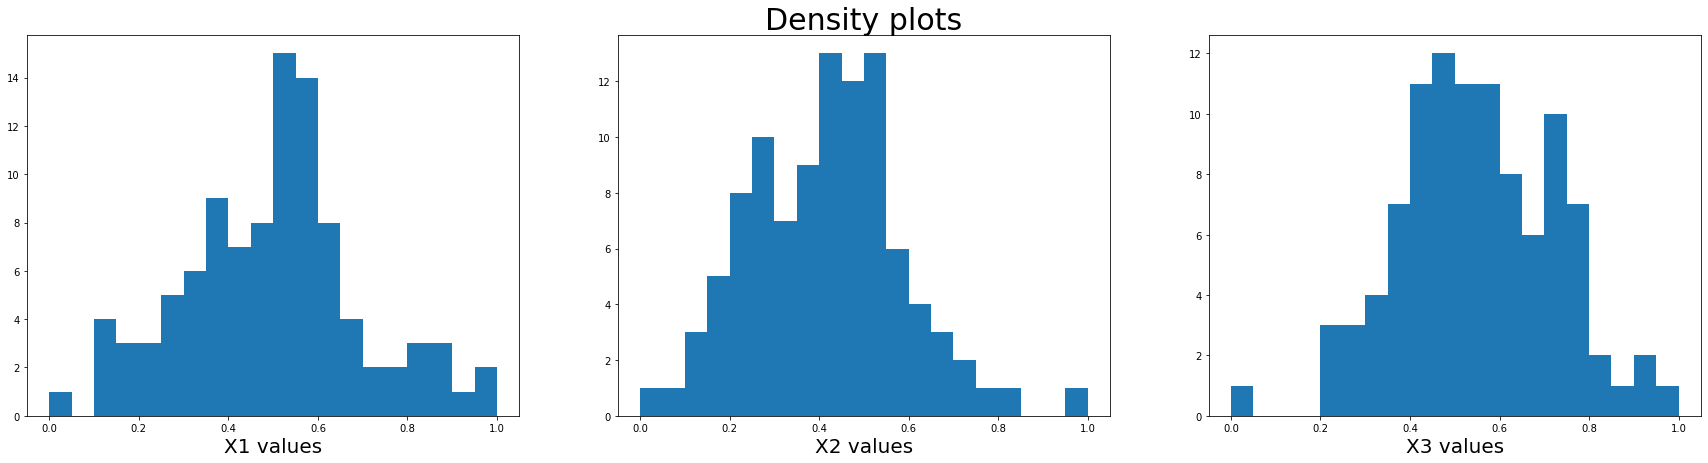

In [17]:
fig = plt.figure(figsize=(30, 7))

plt.subplot(131)
plt.hist(X[1], bins=20)
plt.xlabel('X1 values', {'fontsize': 20})

plt.subplot(132)
plt.hist(X[2], bins=20)
plt.title('Density plots', {'fontsize': 30})
plt.xlabel('X2 values', {'fontsize': 20})

plt.subplot(133)
plt.hist(X[3], bins=20)
plt.xlabel('X3 values', {'fontsize': 20})

plt.show()

#### Все значения теперь лежат на промежутке 0-1

## Gradient Descent

In [26]:
n = X.shape[1]
alpha = 1e-1
W = np.random.randn(X.shape[0])

mse_history = []
w_history = []


for i in range(3501):
    y_pred = np.dot(W, X)
    mse = calc_mse(y, y_pred)
    
    mse_history.append(mse)
    w_history.append(W.copy())
    
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
    
    if i % 500 == 0:
        print(i, W, mse)

0 [-0.15234787  1.2375298   3.81527941  2.03449815] 6995.873409810143
500 [-234.80273889   81.20660964  407.56856144   59.27881177] 599.7631006394989
1000 [-291.9708916   108.55648869  458.94901675   97.94491322] 405.2082858780009
1500 [-304.74571695  114.70645834  469.1369676   107.52470121] 395.78531870961194
2000 [-307.57880644  116.06721247  471.35412183  109.68389543] 395.3230914917594
2500 [-308.20648224  116.36849945  471.84390392  110.16352087] 395.30041066308877
3000 [-308.34552537  116.43523259  471.95235134  110.26981244] 395.2992977385833
3500 [-308.37632564  116.45001473  471.97637246  110.2933593 ] 395.29924312853285


## SGD model

In [27]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    print(W)
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    inner_mse_history = []
    outer_mse_history = []
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

#             print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err_tmp = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
            
            inner_mse_history.append(err_tmp)
        
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        outer_mse_history.append(err)

        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, inner_mse_history, outer_mse_history

In [32]:
new_W, inner_mse_history, outer_mse_history = eval_sgd_model(X, y, iterations=5000, qty_in_batch=1, alpha=1e-1)

[ 0.13531899 -0.93503714  0.01579387 -1.20637365]
500 [-234.16816467   81.0757438   407.30005484   58.88707609] 601.2141729492563
1000 [-291.7978383   108.63460632  459.09142351   97.9697836 ] 405.23136569971285
1500 [-304.6694529   114.83047899  469.35593663  107.64599042] 395.8449575847506
2000 [-307.52263083  116.20078578  471.58846475  109.82598322] 395.40721253637673
2500 [-308.15445073  116.50404108  472.08138932  110.31000495] 395.3906871711287
3000 [-308.29434387  116.57117751  472.19047876  110.41721932] 395.3909695109568
3500 [-308.32531738  116.58604175  472.21463031  110.44095909] 395.3912252293231
4000 [-308.33217515  116.5893328   472.21997758  110.44621532] 395.3912913186458
4500 [-308.33369351  116.59006146  472.22116151  110.44737909] 395.39130641561917
5000 [-308.33402969  116.59022279  472.22142364  110.44763676] 395.3913097809626


### Ниже 2 графика сравнивают прогресси значений MSE двух моделей

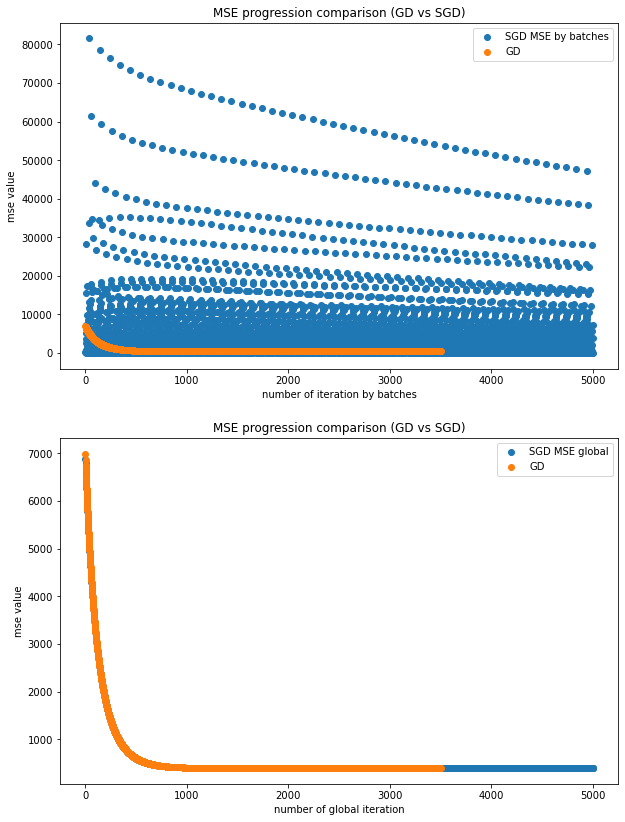

In [38]:
fig = plt.figure(figsize=(10, 14))

plt.subplot(211)
plt.scatter(range(len(inner_mse_history[:5000])), inner_mse_history[:5000], label='SGD MSE by batches')
plt.scatter(range(len(mse_history)), mse_history, label='GD')
plt.xlabel('number of iteration by batches')
plt.ylabel('mse value')
plt.title('MSE progression comparison (GD vs SGD)')
plt.legend(loc='best')

plt.subplot(212)
plt.scatter(range(len(outer_mse_history)), outer_mse_history, label='SGD MSE global')
plt.scatter(range(len(mse_history)), mse_history, label='GD')
plt.xlabel('number of global iteration')
plt.ylabel('mse value')
plt.title('MSE progression comparison (GD vs SGD)')
plt.legend(loc='best')

plt.show()

## Промежуточный вывод: 
**Скорость обучения** подбирал вручную, **1е-1** дает оптимальный результат по скорости/качеству mse

**Обычной** модели градиентного спуска понадобилось **+-2000 итераций**, чтобы сойтись на значении **mse = 395.32**
  
А модели **стохастического** град. спуска понадобилось **2000 * 100 итераций**, чтобы сойтись на значении **mse = 395.40**

Может быть я сделал что то неправильно, может быть так и надо, я очень долго уже сижу и тыкаю разные параметры и пытаюсь сделать что то со стохастическим спуском, но я плохо понимаю, как именно он реализован, если честно...

В моем случаи результаты **лучше и быстрее у полного град. спуска**

# Добавляем L2-регуляризацию

В функцию, считающую MSE, нужно добавить норму вектора весов

Тогда функция потерь будет выглядить так: <code>1/n * 2 * X.T @ (y_pred - y) + 2 * lambda_ * W</code>

In [82]:
def gradient_descent_ridge(X, y, iterations, alpha, lambda_):
    n = X.shape[1]
    W = np.random.randn(X.shape[0])

    mse_history = []
    w_history = [W.copy()]


    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        mse = calc_mse(y, y_pred)

        mse_history.append(mse)
        w_history.append(W.copy())

        W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)) + 2 * lambda_ * W)

        if i % 500 == 0:
            print(i, W, mse)

    w_history = np.array(w_history)
    
    return W, w_history, mse_history

Тоже самое проделываем с SGD моделью

In [113]:
def eval_sgd_model_ridge(X, y, iterations, alpha, lambda_, qty_in_batch=1):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    inner_mse_history = []
    outer_mse_history = []
    
    sgd_w_history = [W.copy()]
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

#             print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err_tmp = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T) + 2 * lambda_ * W))
            
            inner_mse_history.append(err_tmp)
        
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        outer_mse_history.append(err)
        sgd_w_history.append(W.copy())

        if i % (iterations / 2) == 0:
            print(i, W, err)
            
    sgd_w_history = np.array(sgd_w_history)
            
    return W, sgd_w_history, inner_mse_history, outer_mse_history

### Еще добавил в SGD модель лог изменения весов. Ниже графики изменения весов

In [127]:
W, w_history, mse_history = gradient_descent_ridge(X, y, 1000, 1e-1, 1e-8)

500 [-234.65096528   81.15499604  407.37787882   59.19791192] 600.6808327285314
1000 [-291.93555385  108.53973972  458.91919527   97.91940879] 405.25124523775224


In [128]:
W, sgd_w_history, inner_mse_history, outer_mse_history = eval_sgd_model_ridge(X, y, 2000, 1e-1, 1e-8)

1000 [-291.82137299  108.64649095  459.10123022   97.99372326] 405.20424077547
2000 [-307.50326673  116.1922607   471.5668887   109.81531887] 395.40816905617174


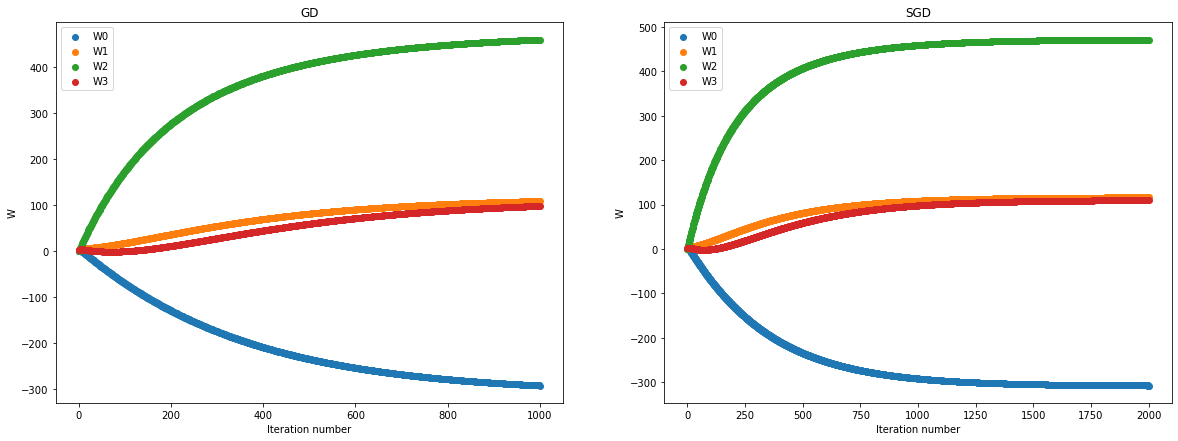

In [129]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
for itm in range(w_history.shape[1]):
    label = 'W' + str(itm)
    plt.scatter(range(w_history.shape[0]), w_history[:, itm], label=label)
plt.title('GD')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('W')

plt.subplot(122)
for itm in range(sgd_w_history.shape[1]):
    label = 'W' + str(itm)
    plt.scatter(range(sgd_w_history.shape[0]), sgd_w_history[:, itm], label=label)
plt.title('SGD')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('W')

plt.show()

Можно заметить, что кажется, как будто SGD сходится в весах быстрее GD, но стоит учитывать, что кол-во итераций SGD умножается на кол-во значений. Если взять это во внимание, то полный градиентный спуск в моем случае отрабатывает значительно быстрее

## Посмотрим как влияет изменения лямбды регуляризации на MSE в моделях GD/SGD

500 [-234.27698421   80.95015478  407.12091491   58.90896175] 602.6793353385345
1000 [-291.85390016  108.50014417  458.85648668   97.8566224 ] 405.3499892858722
500 [-119.76050527   37.03094545  242.26534434   17.976546  ] 2128.5805450938196
1000 [-123.89920711   39.0097184   246.08529804   20.70138925] 2063.897916176231
500 [-74.90369212  21.61138899 169.77361209   6.14684109] 3267.6207504801278
1000 [-75.26645095  21.78447002 170.11388044   6.3818982 ] 3260.2955609429405
500 [-52.93930672  14.88340769 130.69428823   2.19493404] 3989.7716666176216
1000 [-52.97446186  14.90003741 130.72763173   2.21756729] 3988.9770722232597
500 [-40.25666746  11.38511148 106.45198825   0.73636704] 4474.146595725511
1000 [-40.26027178  11.3868124  106.45542417   0.73867817] 4474.0597955327585


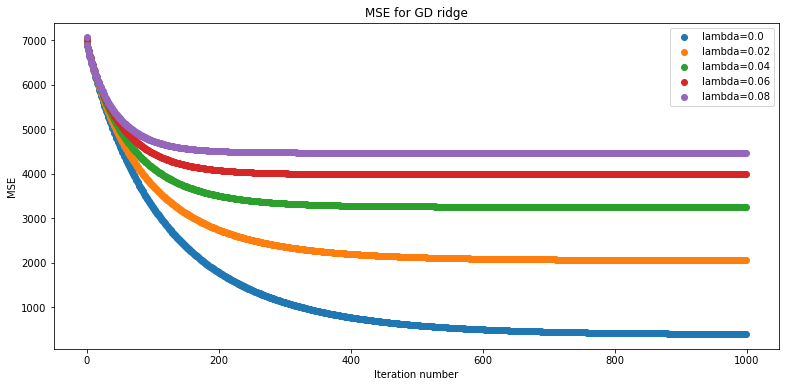

In [101]:
plt.figure(figsize=(13, 6))
for i in np.arange(0, 1e-1, 2e-2):
    _, _, mse_history = gradient_descent_ridge(X, y, 1000, 1e-1, i)
    plt.scatter(range(len(mse_history)), mse_history, label=f'lambda={i}')

plt.title('MSE for GD ridge')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

Все как и должно быть, модель штрафуется за большие веса, при этом увеличивается ошибка

1000 [-291.85944983  108.66430047  459.13845689   98.01765148] 405.1577821092314
2000 [-307.52564647  116.20223288  471.59081507  109.82829553] 395.4070644215935
1000 [0.90508588 1.86165795 6.74062882 1.16408282] 6765.78484436517
2000 [0.90508588 1.86165795 6.74062882 1.16408282] 6765.78484436517
1000 [0.90685111 1.23850129 3.56403716 0.80110726] 6860.52214427703
2000 [0.90685111 1.23850129 3.56403716 0.80110726] 6860.52214427703
1000 [0.74518788 0.94715597 2.423964   0.58803535] 6898.932485143059
2000 [0.74518788 0.94715597 2.423964   0.58803535] 6898.932485143059
1000 [0.61481681 0.77501242 1.82904399 0.45220413] 6920.498924113976
2000 [0.61481681 0.77501242 1.82904399 0.45220413] 6920.498924113976


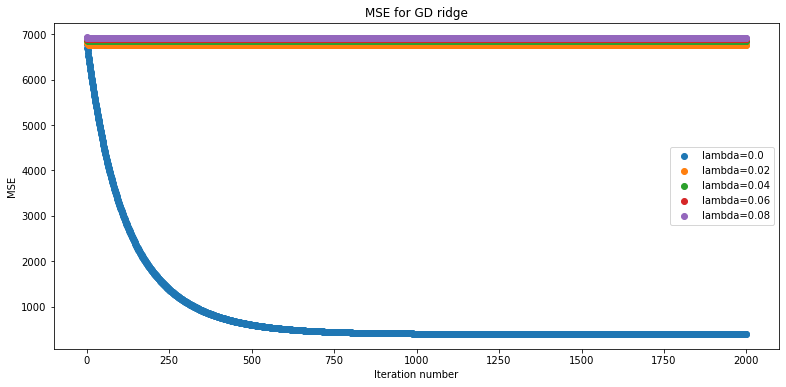

In [114]:
plt.figure(figsize=(13, 6))
for i in np.arange(0, 1e-1, 2e-2):
    _, _, _, outer_mse_history = eval_sgd_model_ridge(X, y, 2000, 1e-1, i)
    plt.scatter(range(len(outer_mse_history)), outer_mse_history, label=f'lambda={i}')

plt.title('MSE for GD ridge')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

Стохастическому градиентному спуску стало очень плохо, из за добавления регуляризации... Веса практически превратились в нули

# L1-регуляризация

In [115]:
def gradient_descent_lasso(X, y, iterations, alpha, lambda_):
    n = X.shape[1]
    W = np.random.randn(X.shape[0])

    mse_history = []
    w_history = [W.copy()]


    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        mse = calc_mse(y, y_pred)

        mse_history.append(mse)
        w_history.append(W.copy())

        W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)) +  lambda_ * np.sign(W))

        if i % 500 == 0:
            print(i, W, mse)

    w_history = np.array(w_history)
    
    return W, w_history, mse_history

In [116]:
def eval_sgd_model_lasso(X, y, iterations, alpha, lambda_, qty_in_batch=1):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    inner_mse_history = []
    outer_mse_history = []
    
    sgd_w_history = [W.copy()]
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

#             print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err_tmp = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T) +  lambda_ * np.sign(W)))
            
            inner_mse_history.append(err_tmp)
        
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        outer_mse_history.append(err)
        sgd_w_history.append(W.copy())

        if i % (iterations / 2) == 0:
            print(i, W, err)
            
    sgd_w_history = np.array(sgd_w_history)
            
    return W, sgd_w_history, inner_mse_history, outer_mse_history

In [130]:
W, w_history, mse_history = gradient_descent_lasso(X, y, 1000, 1e-1, 1e-8)

500 [-234.27133713   80.95203177  407.10358187   58.91020407] 602.7267221970937
1000 [-291.85235407  108.49945419  458.85489529   97.85568345] 405.35192102511223


In [131]:
W, sgd_w_history, inner_mse_history, outer_mse_history = eval_sgd_model_lasso(X, y, 2000, 1e-1, 1e-8)

1000 [-291.8589441   108.66336134  459.13785269   98.0180597 ] 405.1583429250493
2000 [-307.52558427  116.20219955  471.59076722  109.82825028] 395.4070673751684


### Изменения весов в GD_lasso и SGD_lasso

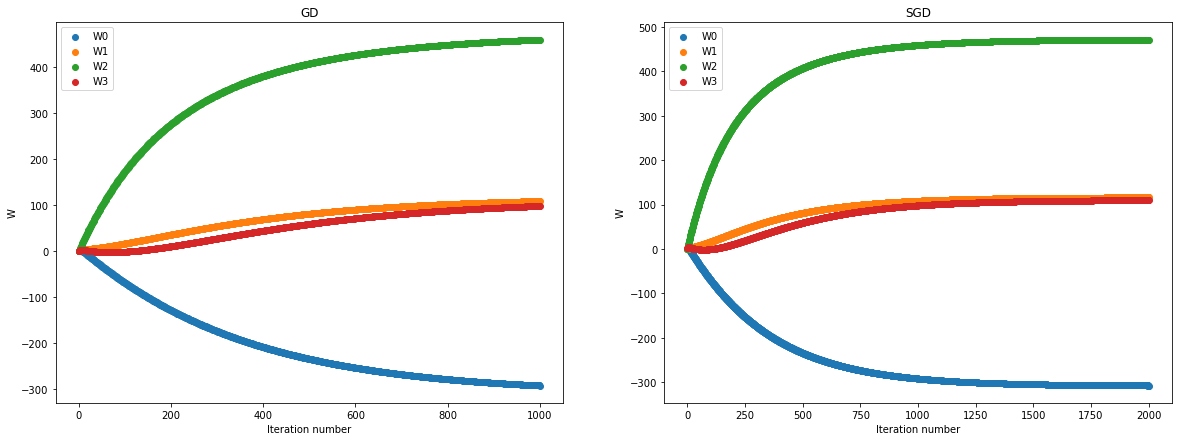

In [132]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
for itm in range(w_history.shape[1]):
    label = 'W' + str(itm)
    plt.scatter(range(w_history.shape[0]), w_history[:, itm], label=label)
plt.title('GD')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('W')

plt.subplot(122)
for itm in range(sgd_w_history.shape[1]):
    label = 'W' + str(itm)
    plt.scatter(range(sgd_w_history.shape[0]), sgd_w_history[:, itm], label=label)
plt.title('SGD')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('W')

plt.show()

Скорость сходимости весов практически не изменилась, после смены L2-регуляризации на L1

### Изменения MSE в зависимости от лямбды L1-регуляризации для GD

500 [-234.5622474    81.06066352  407.30615838   59.17914367] 601.1586870379587
1000 [-291.91698704  108.529783    458.9041967    97.90655783] 405.27365978590825
500 [-233.79645412   80.65367984  406.75417755   58.59050603] 605.2931938551518
1000 [-291.09681397  108.0739155   458.29076213   97.31144986] 406.27975921897
500 [-233.02477691   80.23472008  406.17260939   58.02453876] 609.5315268369764
1000 [-290.27510677  107.61705358  457.67521245   96.7160962 ] 407.3367710342565
500 [-232.50811739   79.88597142  405.81823826   57.67974951] 612.3365007413437
1000 [-289.51132888  107.18704089  457.10528107   96.16556705] 408.3622871326581
500 [-232.17933651   79.66762444  405.61769827   57.43643715] 614.0994445045075
1000 [-288.78852921  106.77751827  456.56793728   95.64514229] 409.371147933915


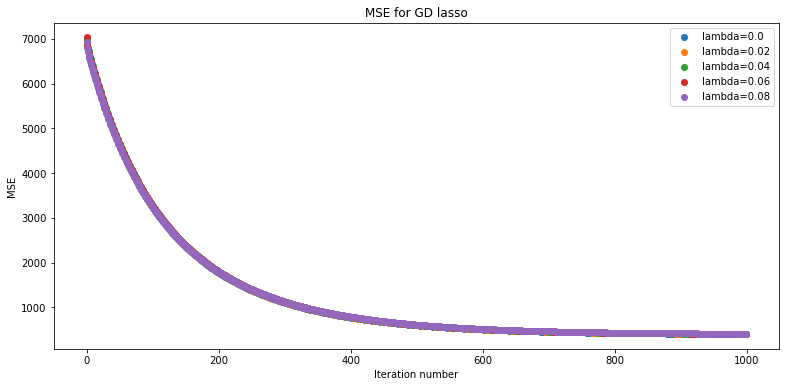

In [124]:
plt.figure(figsize=(13, 6))
for i in np.arange(0, 1e-1, 2e-2):
    _, _, mse_history = gradient_descent_lasso(X, y, 1000, 1e-1, i)
    plt.scatter(range(len(mse_history)), mse_history, label=f'lambda={i}')

plt.title('MSE for GD lasso')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

На полный градиентный спуск L1-регуляризация практически не повлияла. При увеличении лямбды от 0 до 0.08 MSE увеличилось с 405.27 до 409.37, что составляет буквально 1%

### Изменения MSE в зависимости от лямбды L1-регуляризации для SGD

1000 [-291.75862771  108.61533133  459.06066267   97.94029037] 405.27840002346244
2000 [-307.52070995  116.19986372  471.58696652  109.82451149] 395.407307223594
1000 [-213.32110193   64.6833611   400.36529294   41.21144575] 722.0540018818759
2000 [-224.40719182   70.03480778  409.28657134   49.47070234] 650.0833550788452
1000 [-1.45736806e+02  2.24860246e+01  3.44899153e+02  1.42240482e-01] 1362.3450773555783
2000 [-1.48406898e+02  2.46035012e+01  3.48632921e+02  1.44549432e-01] 1327.8311265628502
1000 [-1.12779757e+02  1.96663440e-01  2.94930333e+02 -4.18873916e-02] 1880.4234944143461
2000 [-1.13621355e+02  2.06140585e-01  2.96901967e+02 -3.43374378e-02] 1863.4301126734022
1000 [-9.17699808e+01  1.02874089e-01  2.46925902e+02 -5.13765338e-02] 2367.6905793033675
2000 [-9.24674187e+01  1.00008736e-01  2.48559501e+02 -4.71116724e-02] 2349.023020509577


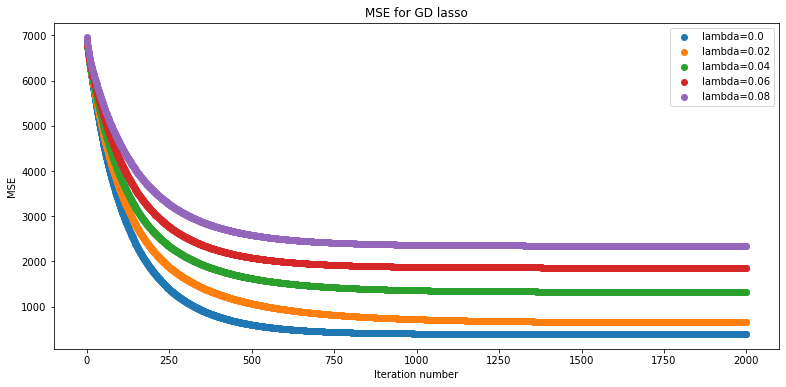

In [125]:
plt.figure(figsize=(13, 6))
for i in np.arange(0, 1e-1, 2e-2):
    _, _, _, outer_mse_history = eval_sgd_model_lasso(X, y, 2000, 1e-1, i)
    plt.scatter(range(len(outer_mse_history)), outer_mse_history, label=f'lambda={i}')

plt.title('MSE for GD lasso')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

А вот на стохастический град. спуск L1-регуляризация повлияла значительнее, но уже не так резко как с L2.  
Ошибка увеличивается практически в 5 раз при увеличении лямбды с 0 до 0.08, однако L2 регуляризация с самых минимальных значений лямбды увеличивало ошибку в 15 раз